In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [5]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded


,salary_more_then_100k,company_facebook,company_google,job_computer programmer,job_sales executive,degree_masters
0,0,False,True,False,True,False
1,0,False,True,False,True,True
2,1,False,True,False,False,False
3,1,False,True,False,False,True
4,0,False,True,True,False,False
5,1,False,True,True,False,True
6,0,False,False,False,True,True
7,0,False,False,True,False,False
8,0,False,False,False,False,False
9,1,False,False,False,False,True


In [7]:
X = df_encoded.drop('salary_more_then_100k', axis=1)
y = df_encoded['salary_more_then_100k']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
X_train

,company_facebook,company_google,job_computer programmer,job_sales executive,degree_masters
11,True,False,False,True,True
8,False,False,False,False,False
9,False,False,False,False,True
2,False,True,False,False,False
15,True,False,True,False,True
4,False,True,True,False,False
7,False,False,True,False,False
10,True,False,False,True,False
12,True,False,False,False,False
3,False,True,False,False,True


In [11]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [12]:
y_pred = clf.predict(X_test)


In [13]:
pd.DataFrame(y_pred,y_test)

,0
salary_more_then_100k,
0,1
0,1
1,0
1,1
1,1


In [14]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4


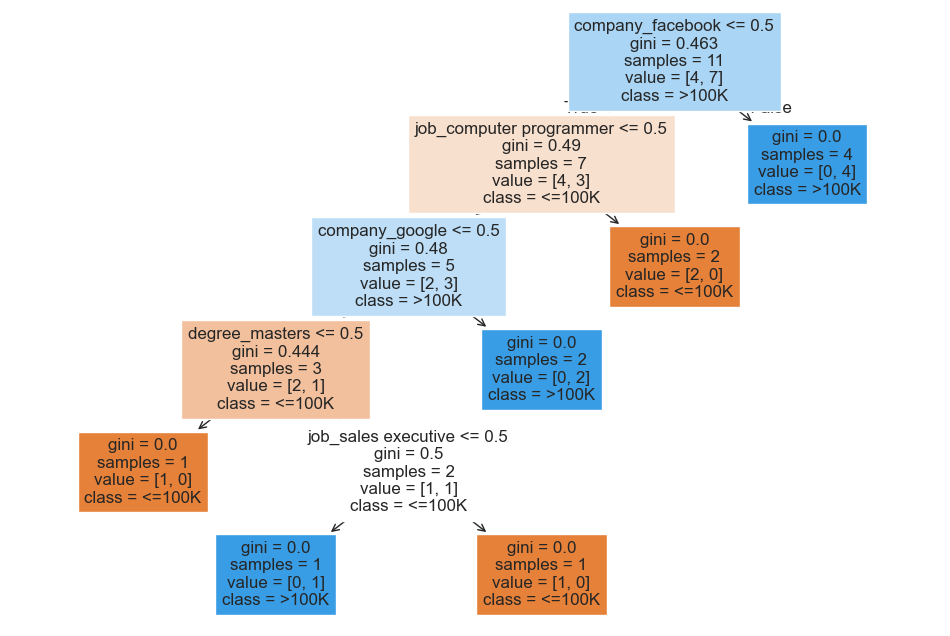

<Figure size 640x480 with 0 Axes>

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['<=100K', '>100K'], filled=True)
plt.show()
plt.savefig('Salaried_DT.svg', format='svg')
